## Data Exploration
This notebook explores trends that relate to NBA success. Hopefully the information will lead to creating a model that predicts the NBA Finals champion. 

In [38]:
import pandas as pd
pd.set_option('display.max_rows', 15)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data = pd.read_csv('./nba_data.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,Team,Year,Wins,Champion,MVP,Scoring Leader,Rebound Leader,Assist Leader,WS Leader,DPOY,...,2P%,FT%,RPG,APG,STL,BLK,TOVPG,PPG,Accolades,Franchise ID
0,Boston Celtics,1960.0,59.0,True,0.0,0.0,0.0,1.0,0.0,0.0,...,0.417,0.734,80.2,24.7,0.0,0.0,0.0,124.5,13.0,Celtics
1,Golden State Warriors,1960.0,49.0,False,1.0,1.0,1.0,0.0,1.0,0.0,...,0.409,0.669,78.9,23.9,0.0,0.0,0.0,118.6,9.0,Warriors
2,Philadelphia 76ers,1960.0,45.0,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.414,0.791,72.1,22.3,0.0,0.0,0.0,118.9,5.0,76ers
3,New York Knicks,1960.0,27.0,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.421,0.765,70.0,22.2,0.0,0.0,0.0,117.3,5.0,Knicks
4,Atlanta Hawks,1960.0,46.0,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.419,0.745,71.2,25.1,0.0,0.0,0.0,113.4,10.0,Hawks
5,Detroit Pistons,1960.0,30.0,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.397,0.729,73.2,19.6,0.0,0.0,0.0,111.6,3.0,Pistons
6,Los Angeles Lakers,1960.0,25.0,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.386,0.730,72.4,19.3,0.0,0.0,0.0,107.3,7.0,Lakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,Denver Nuggets,2017.0,40.0,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.519,0.774,46.4,25.3,6.9,4.0,14.9,111.7,1.0,Nuggets
1321,New Orleans Pelicans,2017.0,34.0,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.495,0.750,43.7,22.8,7.8,5.5,12.9,104.3,5.0,Pelicans


The Celtics and Lakers have had the most success by far. Most of the Celtics' championships are from the Bill Russell era, when they won 11 championships in 13 years. The Lakers enjoyed success from multiple all time greats in Kareem Abdul-Jabbar, Magic Johnson, Shaquille O'Neal, and Kobe Bryant. All six of the Bulls' championships came from GOAT Michael Jordan's 2 three-peats. The Spurs have been perennial contenders for decades. 

In [4]:
data.groupby('Team')['Champion'].sum().sort_values()

Team
Atlanta Hawks              0.0
Toronto Raptors            0.0
Sacramento Kings           0.0
Phoenix Suns               0.0
Orlando Magic              0.0
New Orleans Pelicans       0.0
Minnesota Timberwolves     0.0
                          ... 
Golden State Warriors      2.0
Miami Heat                 3.0
Detroit Pistons            3.0
San Antonio Spurs          5.0
Chicago Bulls              6.0
Los Angeles Lakers        11.0
Boston Celtics            15.0
Name: Champion, dtype: float64

36% of the championship teams have had the regular season MVP on their team. 

In [5]:
data[data['Champion'] == True]['MVP'].sum() / len(data['Year'].unique())

0.3620689655172414

As the amount of shots increases, so does points per game. This is not surprising.

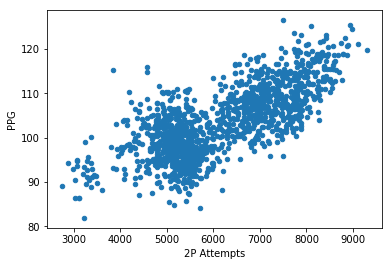

In [6]:
data.plot.scatter(x='2P Attempts', y='PPG')

However, this does not necessarily correlate to wins. That is pretty interesting. 

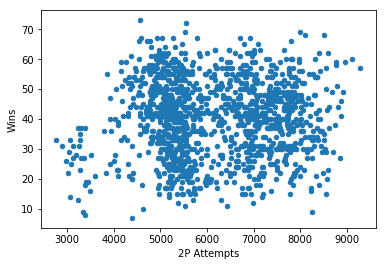

In [7]:
data.plot.scatter(x='2P Attempts', y='Wins')

Having a high field goal percentage appears to have a positive relationship to both points and wins. 

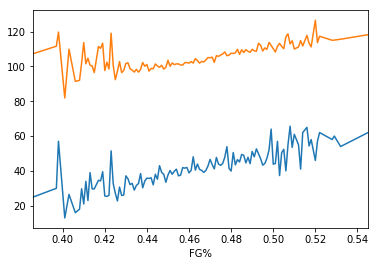

In [8]:
data.groupby('FG%')['Wins'].mean().plot()
data.groupby('FG%')['PPG'].mean().plot()

This plot shows how many accolades are on the championship team versus the typical team. How stacked does your team need to be to win?

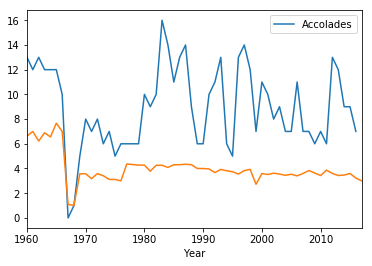

In [9]:
data[data['Champion'] == True].plot(x='Year', y='Accolades')
data.groupby('Year')['Accolades'].mean().plot()

That outlier on the right is the Houston Rockets. Coach Mike D'Antoni's fast paced and efficient 7 second offensive system encouraged the Rockets to take as many threes as they wanted. Players had two options: a layup or a three pointer. Mid range shots were deemed inefficient due to the fact that 2 < 3. 

Disregarding teams that take fewer than approximately 750 three pointers, it appears 3P attempts have a positive linear relationship with points. 

,Team,Year,Wins,Champion,MVP,Scoring Leader,Rebound Leader,Assist Leader,WS Leader,DPOY,...,2P%,FT%,RPG,APG,STL,BLK,TOVPG,PPG,Accolades,Franchise ID
1314,Houston Rockets,2017.0,55.0,False,0.0,0.0,0.0,1.0,1.0,0.0,...,0.552,0.766,44.4,25.2,8.2,4.3,15.1,115.3,5.0,Rockets


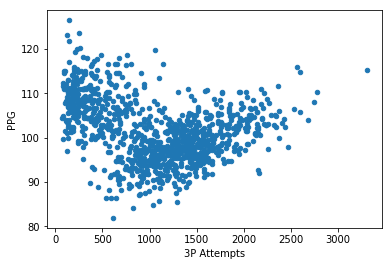

In [10]:
# The 2016-17 Rockets are a massive outlier. 
# They have taken way more 3 point attempts than anyone else.
data[data['3P Attempts']>0].plot.scatter(x='3P Attempts', y='PPG')
data[data['3P Attempts'] > 3000]

This plot shows where the finals champion ranks in comparison to the other teams in terms of the amount of threes they took. It appears since perhaps 2000, the champion has taken more threes than at least the bottom 50% of the league. 

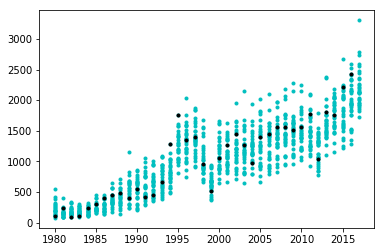

In [11]:
three_data = data[data.Year > 1979]
champ_three = data[(data.Year > 1979) & (data.Champion == True)]
plt.plot(three_data['Year'], three_data['3P Attempts'], 'c.')
plt.plot(champ_three['Year'],champ_three['3P Attempts'], 'k.')

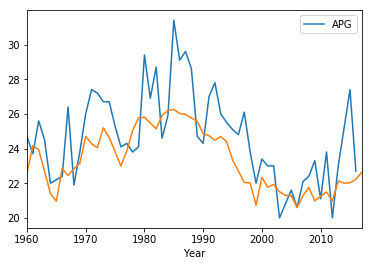

In [12]:
data[data['Champion'] == True].plot(x='Year', y='APG')
data.groupby('Year')['APG'].mean().plot()

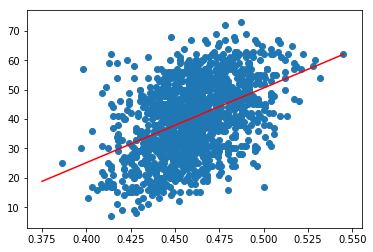

In [13]:
from sklearn.linear_model import LinearRegression
X = pd.DataFrame({"FG%": np.arange(0.375, 0.55, 0.01)})
model = LinearRegression()
model.fit(data[['FG%']], data['Wins'])
y_pred = model.predict(X)



plt.plot(X, y_pred, 'r-')
plt.scatter(x=data['FG%'], y=data['Wins'])

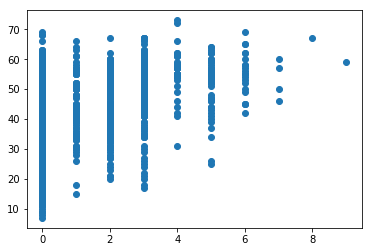

In [14]:
plt.scatter(x=data['All-NBA'], y=data['Wins'])

The Timberwolves are the worst franchise ever. Lakers, Celtics, and Spurs have long history of success. OKC are a very young franchise, have had Kevin Durant for most of the time, Russell Westbrook the whole time

In [19]:
data.groupby('Team')['Wins'].mean().sort_values()

Team
Minnesota Timberwolves    31.357143
Los Angeles Clippers      32.340426
Memphis Grizzlies         33.500000
Brooklyn Nets             33.658537
Charlotte Hornets         35.259259
Sacramento Kings          35.982759
Toronto Raptors           36.565217
                            ...    
Portland Trail Blazers    43.234043
Utah Jazz                 43.395349
Oklahoma City Thunder     43.720000
Phoenix Suns              43.795918
Boston Celtics            48.254237
Los Angeles Lakers        48.775862
San Antonio Spurs         50.414634
Name: Wins, dtype: float64

Importance of 3 pointers in the game has steadily increased
Interesting to see a drop from 1997, the year that the 3p line
distance went back up to its normal distance. The line was shortened
to increase scoring

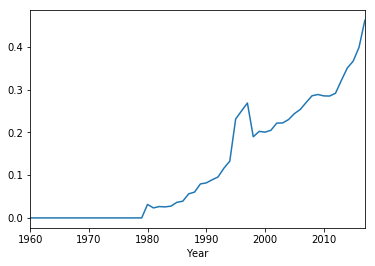

In [16]:
#Importance of 3 pointers in the game has steadily increased
#Interesting to see a drop from 1997, the year that the 3p line
#distance went back up to its normal distance. The line was shortened
#to increase scoring
attempts = data.groupby('Year')['3P Attempts'].mean() / data.groupby('Year')['2P Attempts'].mean()
attempts.plot()

In [21]:
cavs = data[data.Team == 'Cleveland Cavaliers']
warriors = data[data.Team == 'Golden State Warriors']

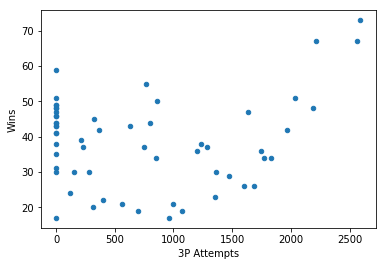

In [22]:
warriors.plot.scatter(x='3P Attempts', y='Wins')

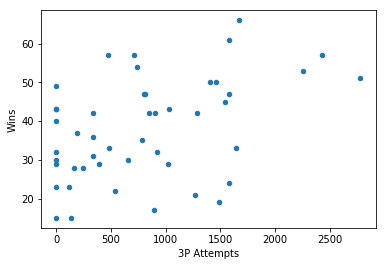

In [23]:
cavs.plot.scatter(x='3P Attempts', y='Wins')

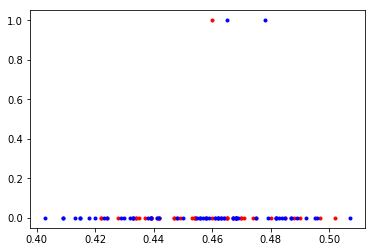

In [24]:
plt.plot(cavs['FG%'], cavs['Champion'], 'r.')
plt.plot(warriors['FG%'], warriors['Champion'], 'b.')

In [25]:
champs = data[data.Champion]
others = data[data.Champion == False]

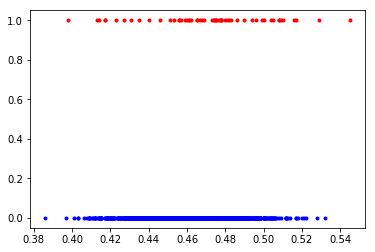

In [26]:
plt.plot(champs['FG%'],champs['Champion'], 'r.')
plt.plot(others['FG%'], others['Champion'], 'b.')

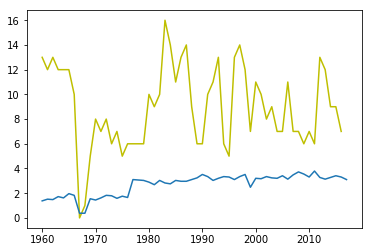

In [27]:
plt.plot(champs['Year'], champs['Accolades'], 'y')
plt.plot(range(1960,2018), others.groupby('Year')['Accolades'].sum()/29)

Year
1960.0    49.0
1961.0    51.0
1962.0    54.0
1963.0    53.0
1964.0    55.0
1965.0    49.0
1966.0    55.0
          ... 
2011.0    62.0
2012.0    50.0
2013.0    60.0
2014.0    59.0
2015.0    60.0
2016.0    73.0
2017.0    67.0
Name: Wins, dtype: float64

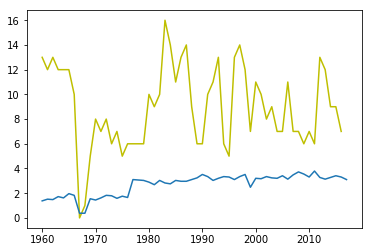

In [28]:
plt.plot(champs['Year'], champs['Accolades'], 'y')
first_seed = others.groupby('Year')['Wins'].max()
plt.plot(range(1960,2018), others.groupby('Year')['Accolades'].sum()/29)
first_seed

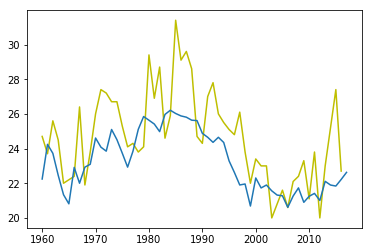

In [29]:
plt.plot(champs['Year'], champs['APG'], 'y')
plt.plot(range(1960,2018), others.groupby('Year')['APG'].mean())

#### There might be a little bit of left skew, but wins are pretty much normally distributed

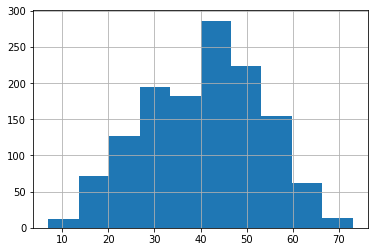

In [30]:
data['Wins'].hist()


### Championships are extremely right skewed. Many teams have only won 1 championship, even more have won none

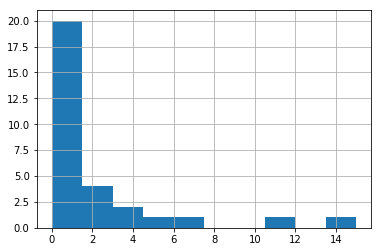

In [34]:
data.groupby('Team')['Champion'].sum().hist()

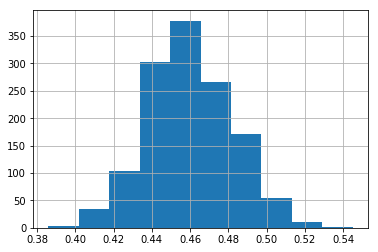

In [31]:
data['FG%'].hist()

In [40]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(data["2P Attempts"], data.Wins)
line = slope*data["2P Attempts"]+intercept
 
traces = [
    Scatter({
            'x' : data['2P Attempts'],
            'y' : data['Wins'],
            'mode' : 'markers',
            'marker' : {'color' : 'lightblue'},
            'name' : 'Data'
        }),
    Scatter({
        'x' : data["2P Attempts"], 
        'y' : line, 
        'mode' : 'lines',
        'marker' : {'color' : 'violet'},
        'name' : 'Fit'
    })
]
 
layout = Layout({
        'title' : "2 Points Attempt vs. Number of Wins",
        'xaxis' : {'title' : '2 Points Attempt'},
        'yaxis' : {'title' : 'Number of Wins'}
    })
 
fig = Figure(data = traces, layout = layout)
 
py.iplot(fig)


#### Analyzing this year's contenders
- Note: size of circle represents wins

In [41]:
# Copy calculation of split_traces.
further_split_traces = []
combinations = ["Golden State Warriors","Cleveland Cavaliers"]
 
for team in combinations:
    further_split_traces.append(
        Scatter({
                'x' : np.arange(2010,2018),
                'y' : data["2P Attempts"][(data.Team == team) & (data.Year >= 2010)],
                'mode' : 'markers',
                'name' : team ,
                'marker' : {'color' : 'red' if team == "Cleveland Cavaliers" else 'yellow',
                            'size' : data["Wins"][(data.Team == team) & (data.Year >= 2010)]},
                
            })
    )
 

interactive_layout = Layout({
        'title' : "Year vs. 2 Points Attempts",
        'xaxis' : {'title' : 'Year'},
        'yaxis' : {'title' : '2 Points Attempts'},
        'updatemenus' : [{
                'x' : -0.15,
                'y' : 1,
                'yanchor' : 'top',  
                #'buttons' : buttons
            }]
    })

interactive_fig = Figure(data = further_split_traces, layout= interactive_layout)
py.iplot(interactive_fig)



In [42]:
further_split_traces = []
combinations = ["Golden State Warriors","Cleveland Cavaliers"]
 
for team in combinations:
    further_split_traces.append(
        Scatter({
                'x' : np.arange(2010,2018),
                'y' : data["3P Attempts"][(data.Team == team) & (data.Year >= 2010)],
                'mode' : 'markers',
                'name' : team ,
                'marker' : {'color' : 'red' if team == "Cleveland Cavaliers" else 'yellow',
                            'size' : data["Wins"][(data.Team == team) & (data.Year >= 2010)]},
                
            })
    )
    
# Create a layout, as earlier.
interactive_layout = Layout({
        'title' : "Year vs. 3P Attempts",
        'xaxis' : {'title' : 'Year'},
        'yaxis' : {'title' : '3P Attempts'},
        'updatemenus' : [{
                'x' : -0.15,
                'y' : 1,
                'yanchor' : 'top',  
                #'buttons' : buttons
            }]
    })
 
# Create a new figure and plot it.
interactive_fig = Figure(data = further_split_traces, layout= interactive_layout)
py.iplot(interactive_fig)
 


In [53]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data.RPG[data.Year >= 2000], data.PPG[data.Year >= 2000])
line = slope*data.RPG[data.Year >= 2000]+intercept
 
# Copy calculation of split_traces.
traces = [
    Scatter({
            'x' : data.RPG[data.Year >= 2000],
            'y' : data.PPG[data.Year >= 2000],
            'mode' : 'markers',
            'name' : 'Data'
        }),
    Scatter({
            'x' : data.RPG[data.Year >= 2000], 
            'y' : line, 
            'mode' : 'lines',
            'marker' : {'color' : 'orange'},
            'name' : 'Fit'
        })
]
 
layout = Layout({
        'title' : "RPG vs. PPG",
        'xaxis' : {'title' : 'RPG'},
        'yaxis' : {'title' : 'PPG'}
    })
 
fig = Figure(data = traces, layout = layout)
 
py.iplot(fig)


In [54]:
data.columns

Index(['Team', 'Year', 'Wins', 'Champion', 'MVP', 'Scoring Leader',
       'Rebound Leader', 'Assist Leader', 'WS Leader', 'DPOY', 'MIP', '6MOY',
       'Coach of Year', 'All-Stars', 'All-Defensive', 'All-NBA', 'FG%',
       '3P Attempts', '3P%', '2P Attempts', '2P%', 'FT%', 'RPG', 'APG', 'STL',
       'BLK', 'TOVPG', 'PPG', 'Accolades', 'Franchise ID'],
      dtype='object')

In [57]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data.APG[data.Year >= 2000], data.PPG[data.Year >= 2000])
line = slope*data.APG[data.Year >= 2000]+intercept
 
# Copy calculation of split_traces.
traces = [
    Scatter({
            'x' : data.APG[data.Year >= 2000],
            'y' : data.PPG[data.Year >= 2000],
            'mode' : 'markers',
            'name' : 'Data'
        }),
    Scatter({
            'x' : data.APG[data.Year >= 2000], 
            'y' : line, 
            'mode' : 'lines',
            'marker' : {'color' : 'orange'},
            'name' : 'Fit'
        })
]
 
layout = Layout({
        'title' : "APG vs. PPG",
        'xaxis' : {'title' : 'APG'},
        'yaxis' : {'title' : 'PPG'}
    })
 
fig = Figure(data = traces, layout = layout)
 
py.iplot(fig)

